This is a work by Nursefa Zengin, 2021. 


In this file, we will conduct time series analysis of the financial data of AMZN, FB, IBM, and MMM. 

## Importing Libraries and Downloading Stock Prices

In [1]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
import numpy as np 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import pylab as pl

### Using fix_yahoo_finance library to download datasets


In [2]:
start = datetime.datetime(2016, 11, 17)
end = datetime.datetime(2021, 11, 17)

import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
amzn = yf.download('AMZN', start=start, end=end)
fb = yf.download('FB',start=start, end=end)
ibm = yf.download('IBM',start=start, end=end)
mmm = yf.download('MMM',start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Checking if any stocks have NAN values
amzn.isnull().any()
#fb.isnull().any()
#ibm.isnull().any()
#mmm.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

### The adjusted close prices for FB, MMM, IBM and AMZN stocks.


In [4]:
amzn_AdjClose= amzn[['Adj Close']]
fb_AdjClose= fb[['Adj Close']]
ibm_AdjClose= ibm[['Adj Close']]
mmm_AdjClose= mmm[['Adj Close']]

#mmm_AdjClose

### Resampling the data to get prices for the end of the business month


In [5]:
amzn_AdjClose_resampled = amzn_AdjClose.resample("BM").last()
fb_AdjClose_resampled = fb_AdjClose.resample("BM").last()
ibm_AdjClose_resampled = ibm_AdjClose.resample("BM").last()
mmm_AdjClose_resampled = mmm_AdjClose.resample("BM").last()

#type(amzn_AdjClose_resampled)

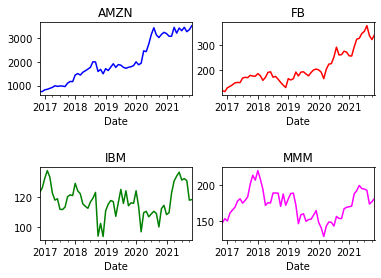

In [6]:
fig,axs = plt.subplots(2,2)

amzn_AdjClose_resampled.plot(ax=axs[0,0], title='AMZN',color=['blue'],legend=None)

fb_AdjClose_resampled.plot(ax=axs[0,1], title='FB',color=['red'],legend=None)

ibm_AdjClose_resampled.plot(ax=axs[1,0], title='IBM',color=['green'],legend=None)

mmm_AdjClose_resampled.plot(ax=axs[1,1], title='MMM',color=['magenta'],legend=None)

hspace =1
pl.subplots_adjust( hspace=hspace )


#### Combining 4 stocks into single dataframe side by side  <a id='combine'></a>


In [7]:
all_stocks_list =pd.concat([amzn_AdjClose_resampled,fb_AdjClose_resampled,ibm_AdjClose_resampled,mmm_AdjClose_resampled], axis=1)
all_stocks_list.columns = ['AMZN_AdjClose', 'FB_AdjClose', 'IBM_AdjClose', 'MMM_AdjClose']
all_stocks_list

,AMZN_AdjClose,FB_AdjClose,IBM_AdjClose,MMM_AdjClose
Date,,,,
2016-11-30,750.570007,118.419998,123.302010,147.767609
2016-12-30,749.869995,115.050003,126.167519,153.644257
2017-01-31,823.479980,130.320007,132.651108,150.417664
2017-02-28,845.039978,135.539993,137.760315,161.382416
2017-03-31,886.539978,142.050003,133.408844,165.695221
...,...,...,...,...
2021-07-30,3327.590088,356.299988,131.472778,194.854706
2021-08-31,3470.790039,379.380005,132.401474,193.167984
2021-09-30,3285.040039,339.390015,131.071228,174.003937


In [8]:
#Checking to see if there is any missing values
all_stocks_list.isnull().any()

AMZN_AdjClose    False
FB_AdjClose      False
IBM_AdjClose     False
MMM_AdjClose     False
dtype: bool

### autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.


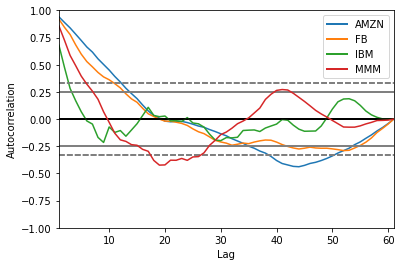

In [9]:
from pandas.plotting import autocorrelation_plot
from matplotlib.lines import Line2D

plot_color = []

for variable in all_stocks_list.columns:
    ax = autocorrelation_plot(all_stocks_list[variable])
    plot_color.append((ax.get_lines()[-1].get_color()))

custom_lines = [Line2D([0],[0], color=plot_color [0], lw=2),
                Line2D([0],[0], color=plot_color [1], lw=2),
                Line2D([0],[0], color=plot_color [2], lw=2),
                Line2D([0],[0], color=plot_color [3], lw=2)]
                
ax.legend(custom_lines, ['AMZN', 'FB', 'IBM','MMM'])

 - In this plot, we can see that in the first year, there is a correlation between stock price and time for AMZN, FB and MMM stocks. IBM stock values seem to be correlated only for the first couple of months. 
- From year 1 to around year 3, we can not say that there are any significant values that show any correlation for AMZN, between year 3 and 4, we can again see some values for AMZN.
- FB and IBM have no important correlation mostly for the rest of the years. 
- And finally, we see some correlation for MMM between year 1.5 and 2.5.



### Monthly returns for each stock using shift() function.


#### 1. Using each stock separately: 


In [10]:
amzn_Mreturn = (amzn_AdjClose_resampled - amzn_AdjClose_resampled.shift(1))/amzn_AdjClose_resampled.shift(1)
fb_Mreturn = (fb_AdjClose_resampled - fb_AdjClose_resampled.shift(1))/fb_AdjClose_resampled.shift(1)
ibm_Mreturn = (ibm_AdjClose_resampled - ibm_AdjClose_resampled.shift(1))/ibm_AdjClose_resampled.shift(1)
mmm_Mreturn = (mmm_AdjClose_resampled - mmm_AdjClose_resampled.shift(1))/mmm_AdjClose_resampled.shift(1)

Monthly_returns = [amzn_Mreturn,fb_Mreturn,ibm_Mreturn,mmm_Mreturn]
Monthly_returns 

[            Adj Close
 Date                 
 2016-11-30        NaN
 2016-12-30  -0.000933
 2017-01-31   0.098164
 2017-02-28   0.026182
 2017-03-31   0.049110
 ...               ...
 2021-07-30  -0.032722
 2021-08-31   0.043034
 2021-09-30  -0.053518
 2021-10-29   0.026602
 2021-11-30   0.049896
 
 [61 rows x 1 columns],
             Adj Close
 Date                 
 2016-11-30        NaN
 2016-12-30  -0.028458
 2017-01-31   0.132725
 2017-02-28   0.040055
 2017-03-31   0.048030
 ...               ...
 2021-07-30   0.024704
 2021-08-31   0.064777
 2021-09-30  -0.105409
 2021-10-29  -0.046613
 2021-11-30   0.059925
 
 [61 rows x 1 columns],
             Adj Close
 Date                 
 2016-11-30        NaN
 2016-12-30   0.023240
 2017-01-31   0.051389
 2017-02-28   0.038516
 2017-03-31  -0.031587
 ...               ...
 2021-07-30  -0.038406
 2021-08-31   0.007064
 2021-09-30  -0.010047
 2021-10-29  -0.099547
 2021-11-30   0.003698
 
 [61 rows x 1 columns],
             Adj Close
 D

#### 2.  Using one dataframe to show all returns 


In [11]:
current_month= all_stocks_list
last_month = all_stocks_list.shift(1) 
Monthly_returns_all = (current_month - last_month)/last_month
Monthly_returns_all.fillna(method='bfill', inplace=True)
Monthly_returns_all

,AMZN_AdjClose,FB_AdjClose,IBM_AdjClose,MMM_AdjClose
Date,,,,
2016-11-30,-0.000933,-0.028458,0.023240,0.039770
2016-12-30,-0.000933,-0.028458,0.023240,0.039770
2017-01-31,0.098164,0.132725,0.051389,-0.021000
2017-02-28,0.026182,0.040055,0.038516,0.072895
2017-03-31,0.049110,0.048030,-0.031587,0.026724
...,...,...,...,...
2021-07-30,-0.032722,0.024704,-0.038406,-0.003474
2021-08-31,0.043034,0.064777,0.007064,-0.008656
2021-09-30,-0.053518,-0.105409,-0.010047,-0.099209


### autotocorrelation_plot() to plot the autocorrelation of the monthly returns.


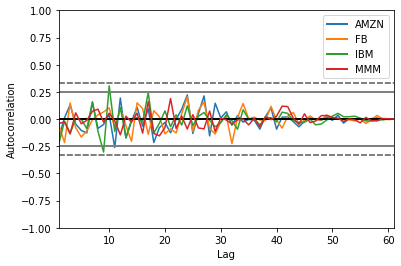

In [12]:
from pandas.plotting import autocorrelation_plot
from matplotlib.lines import Line2D

plot_color = []

for variable in Monthly_returns_all.columns:
    ax = autocorrelation_plot(Monthly_returns_all[variable])
    plot_color.append((ax.get_lines()[-1].get_color()))

custom_lines = [Line2D([0],[0], color=plot_color [0], lw=2),
                Line2D([0],[0], color=plot_color [1], lw=2),
                Line2D([0],[0], color=plot_color [2], lw=2),
                Line2D([0],[0], color=plot_color [3], lw=2)]
                
ax.legend(custom_lines, ['AMZN', 'FB', 'IBM','MMM'])



As we can see in the plot, there is no significant trend seen in the monthly returns, the values are randomly distributed, and therefore, we can concluded that the stock price returns are not affected by the time.


### Visualization of  the correlation between the returns of all pairs of stocks using a scatter plot matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

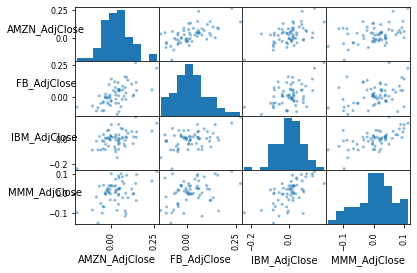

In [13]:
Monthly_returns_all

from pandas.plotting import scatter_matrix
sm=scatter_matrix(Monthly_returns_all)

#Change label rotation
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
#[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]


plt.show




- As can be seen from the plot above, AMZN and FB, IBM and MMM show positive linear and very close to strong correlation. 

- However, I cannot clearly comment on AMZN and MMM, FB and MMM, AMZN and IBM, FB and IBM pairs as they might have weak or mild correlations. They are the ones with points that are not clearly arranged in a linear fashion. Hence, I want to find their correlation coefficients to comment further. 

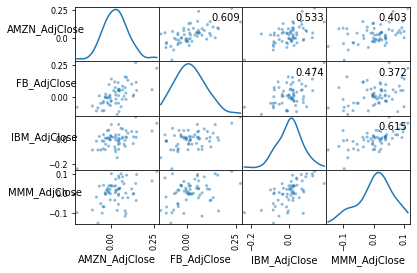

In [14]:
sm=scatter_matrix(Monthly_returns_all, alpha=0.5, diagonal='kde')
corr = Monthly_returns_all.corr().values

#Change label rotation
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

for i, j in zip(*plt.np.triu_indices_from(sm, k=1)):
    sm[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

- It is clear that AMZN and FB, IBM and MMM show positive, close to strong correlation (over 0.6) as indicated in the previous plot. 

- AMZN and MMM, FB and MMM, AMZN and IBM, FB and IBM pairs have mild correlations (0.3-0.5).

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

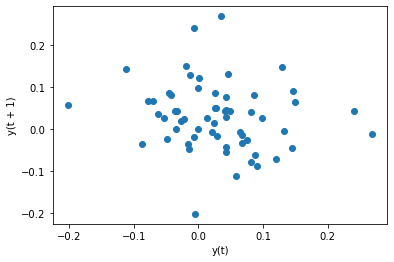

In [15]:
pd.plotting.lag_plot(Monthly_returns_all['AMZN_AdjClose'])